### PS 4 
#### Donghai Yu
#### Feb.4th

## Question I
## (a)

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [171]:
df_auto = pd.read_csv("/Users/donghaiy/Desktop/Macs_30100/Auto.csv", na_values="?")
df_auto = df_auto.dropna()
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## (b)

In [170]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

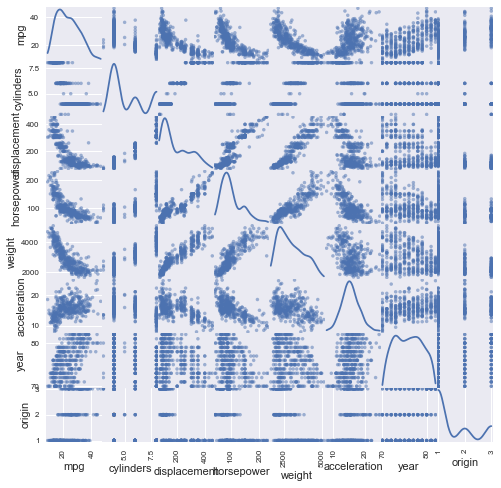

In [140]:
scatter_matrix(df_auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']], 
               alpha=0.5, figsize=(8,8), diagonal='kde')
plt.show()

## (c)

In [141]:
df_auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## (d)

In [172]:
df_auto['const'] = 1
reg1 = sm.OLS(endog=df_auto['mpg'], exog=df_auto[['const', 'cylinders', 'displacement', 
                                          'horsepower', 'weight', 'acceleration', 
                                          'year', 'origin']], missing='drop')
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        22:26:20   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

#### i. Displacement, weight, year and origin are significant at 1% level.
#### ii. Acceleration, cylinders, and horsepower are not significant at 10% level.
#### iii. When year increases in one, mpg increases approximately 0.7508.

## (e)
####  Displacement, horsepower and weight seems to share a nonlinear relationship with MPG.

#### (i)

In [144]:
df_auto['dis_sq'] = df_auto['displacement'] ** 2
df_auto['hor_sq'] = df_auto['horsepower'] ** 2
df_auto['wei_sq'] = df_auto['weight'] ** 2
df_auto['acc_sq'] = df_auto['acceleration'] ** 2

In [145]:
reg2 = sm.OLS(endog=df_auto['mpg'], exog=df_auto[['const', 'cylinders', 'displacement', 
                                          'horsepower', 'weight', 'acceleration', 
                                          'year', 'origin', 'dis_sq', 'hor_sq', 
                                          'wei_sq', 'acc_sq']], missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        22:05:23   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.1084      6.696      3.003   

#### ii.  0.866>0.818, so it is better than the previous estimation. 

#### iii, unlike in the previous estimation, in this estimation the both the displacement's variable coefficient and its squared coefficient becomes not *statistically significant*.

#### iv. The cylinder's coefficient changes from -0.4934 to 0.2519. In both estimations, it is not *statistically significant*.

In [146]:
results2.predict(exog=[1, 6, 200, 100, 3100, 15.1, 99, 1, 200**2, 100**2, 3100**2, 15.1**2])


array([ 38.7321111])

#### The predicted value is 38.73

### Question 2

#### (a)

In [173]:
df2 = pd.DataFrame({'X1':[0,2,0,0,-1,1], 'X2': [3,0,1,1,0,1], 'X3': [0,0,3,2,1,1], 
                       'Y':['Red', 'Red', 'Red', 'Green', 'Green', 'Red']})
df2
X1, X2, X3 = np.array([0,0,0])
df2['distance'] = ((df2['X1']-X1)**2 +( df2['X2']-X2)**2 + (df2['X3']-X3)**2)**0.5
df2

,X1,X2,X3,Y,distance
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


#### The *distance* above are the Euclidean distance from 1 to 6

#### (b) When K=1, we can observe from the table that our KNN prediction would be *Green*, because Green is the smallest in value. 

#### (c) When K=3, we can observe from the table that our KNN prediction would be *Red*, because for the three distance, 1.41, 1.73, and 2.0, we have two *red* and one *green*, and two *red* is more likely to happen than one *green*.

#### (d) The best value for K would be smaller. Generally, smaller K would be resulted in rough boundaries given non-linear Bayes decision boundary, while Iarger K would result in simplified decision boundaries. 

In [148]:
from sklearn import datasets, neighbors, linear_model
X_train = df2[['X1','X2','X3']]
y_train = df2.Y
knn2 = neighbors.KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)
print(knn2.predict([(1,1,1)]))

['Green']


#### (e) Our prediction would be *Green*.

## Question 3
### (a)

In [178]:
df_super = pd.read_csv('Auto.csv', na_values = "?")
df_super.dropna(inplace=True)
df_super['const'] = 1
mpg_median = df_super['mpg'].median()
df_super['mpg_high'] = df_super['mpg'] > mpg_median
df_super['mpg_high'] = pd.get_dummies(df_super['mpg_high'], drop_first=True)
mpg_median

22.75

In [176]:
# df_super

In [177]:
y = df_super['mpg_high']
X = df_super[['const', 'cylinders', 'displacement', 'horsepower', 
              'weight', 'acceleration', 'year', 'origin']]
LogitModel = sm.Logit(y, X, missing='drop')
LogitReg1 = LogitModel.fit()
LogitReg1.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


/Users/donghaiy/Desktop/Macs_30100/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/donghaiy/Desktop/Macs_30100/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                    -inf
Time:                        22:29:10   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### The regressors weight and year have coefficients that are statistically significant at the 5% level.


## (b) (c)

In [158]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

/Users/donghaiy/Desktop/Macs_30100/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=10)

In [160]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
print(LogReg.coef_)

[[-0.07007242 -0.67082651  0.00587774 -0.03839719 -0.00501046 -0.14055144
   0.29995372 -0.15215205]]


#### The intercept is -0.068.
#### The coefficients from cyl to orgn are -0.654, 0.005, -0.039, -0.005, -0.143, 0.300, -0.149 respectively.

## (d)

In [179]:
y_predict = LogReg.predict(X_test)

In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [181]:
from sklearn import metrics 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



#### The performance of the model predicting low mpg and high mpg is similar. It has slightly higher average for predicting low mpg. 